In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/extract_results.csv"

In [3]:
extract_df = pd.read_csv(csv_file)

In [4]:
extract_df["P_diff_pct"] = ((extract_df["Pasture"] - extract_df["Wheat"]) / (extract_df["Pasture"] - extract_df["Wheat"]).sum() * 100).round(3)

In [5]:
methods = extract_df.groupby("Method")
pools = extract_df.groupby("Pool")
for name, group in methods:
    display(f"Group: {name}")
    display(group)

'Group: CHCl-released NaHCO3'

,Method,Pool,Pasture,Wheat,P_diff_pct
2,CHCl-released NaHCO3,Inorganic,3.8,2.8,0.452
7,CHCl-released NaHCO3,Organic,4.1,2.2,0.859


'Group: H2SO4/H2O2'

,Method,Pool,Pasture,Wheat,P_diff_pct
10,H2SO4/H2O2,Residual,376.0,261.0,51.989


'Group: HCl'

,Method,Pool,Pasture,Wheat,P_diff_pct
5,HCl,Inorganic,133.0,117.0,7.233


'Group: NaHCO3'

,Method,Pool,Pasture,Wheat,P_diff_pct
1,NaHCO3,Inorganic,29.7,15.4,6.465
6,NaHCO3,Organic,19.4,12.3,3.210


'Group: NaOH'

,Method,Pool,Pasture,Wheat,P_diff_pct
3,NaOH,Inorganic,23.0,20.3,1.221
8,NaOH,Organic,107.0,73.0,15.371


'Group: Resin'

,Method,Pool,Pasture,Wheat,P_diff_pct
0,Resin,Inorganic,41.2,23.8,7.866


'Group: Sonicate-NaOH'

,Method,Pool,Pasture,Wheat,P_diff_pct
4,Sonicate-NaOH,Inorganic,12.6,7.8,2.170
9,Sonicate-NaOH,Organic,22.0,15.0,3.165


In [6]:
def plot_grouped_bars(
    df,
    category_col,
    group_col,
    value_cols,
    groups_to_plot=None,
    figsize=(12, 5),
    title=None,
    ylabel="Value"
):
    """
    Plot side-by-side bar charts for multiple numeric series by category,
    split into subplots by group. Uses one shared y-axis label.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe containing the data.
    category_col : str
        Column name for the x-axis categories (e.g., 'Method').
    group_col : str
        Column name used to split data into subplots (e.g., 'Pool').
    value_cols : list of str
        List of numeric column names to plot as separate bars per category.
    groups_to_plot : list of str, optional
        Specific group values to plot. If None, all unique groups are used.
    figsize : tuple, optional
        Figure size (width, height). Default is (12, 5).
    title : str, optional
        Overall figure title.
    ylabel : str, optional
        Label for the shared y-axis.

    Returns
    -------
    None
        Displays the matplotlib figure.
    """
    if groups_to_plot is None:
        groups_to_plot = df[group_col].unique()

    n_groups = len(groups_to_plot)
    fig, axes = plt.subplots(1, n_groups, figsize=figsize, sharey=True)

    # Ensure axes is iterable
    if n_groups == 1:
        axes = [axes]

    width = 0.8 / len(value_cols)  # adjust bar width based on number of series

    for ax, group_value in zip(axes, groups_to_plot):
        subset = df[df[group_col] == group_value]
        x = np.arange(len(subset))

        # Plot each numeric column as a bar series
        for i, col in enumerate(value_cols):
            ax.bar(
                x + (i - len(value_cols)/2) * width + width/2,
                subset[col],
                width,
                label=col
            )

        ax.set_xticks(x)
        ax.set_xticklabels(subset[category_col], rotation=45, ha="right")
        ax.set_title(str(group_value))
        ax.legend()

    # Shared y-axis label
    fig.text(0.04, 0.5, ylabel, va="center", rotation="vertical", fontsize=12)

    if title:
        fig.suptitle(title, fontsize=14, y=1.02)

    plt.tight_layout(rect=[0.05, 0, 1, 1])
    plt.show()

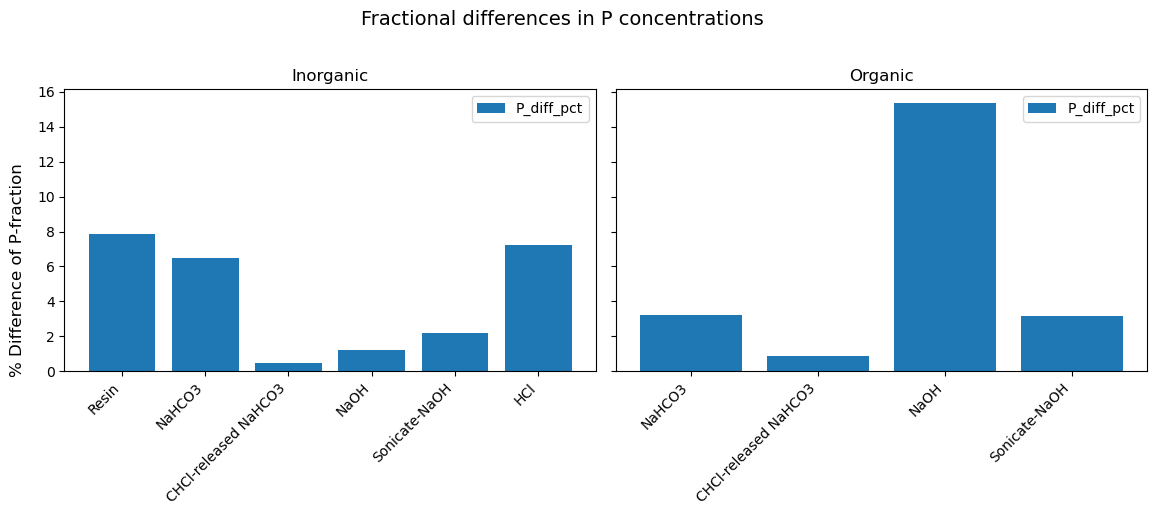

In [12]:
plot_grouped_bars(
    extract_df,
    category_col="Method",
    group_col="Pool",
    value_cols=["P_diff_pct"],
    groups_to_plot=["Inorganic", "Organic"],
    title="Fractional differences in P concentrations",
    ylabel="% Difference of P-fraction"
)

Figure 1. Fractional differences in P concentrations seperated into inorganic (left) and organic pools. From left to right the extraction solvents are progessively stronger and therefore more capable of releasing hard to access P. In all extractions the pasture field has higher P yield with the second largest difference in P fraction from the NaOH extraction (the largest difference is from residual P, displayed below). This suggests that a majority of the P in both fields is bound to transition metals (Al and Fe) and not readily available. Furthermore, the largest proportion of P was derived from the nonextractable residual fraction which represents the P that is structurally bound in tissue and apatite minerals and therefore the most inaccessible.

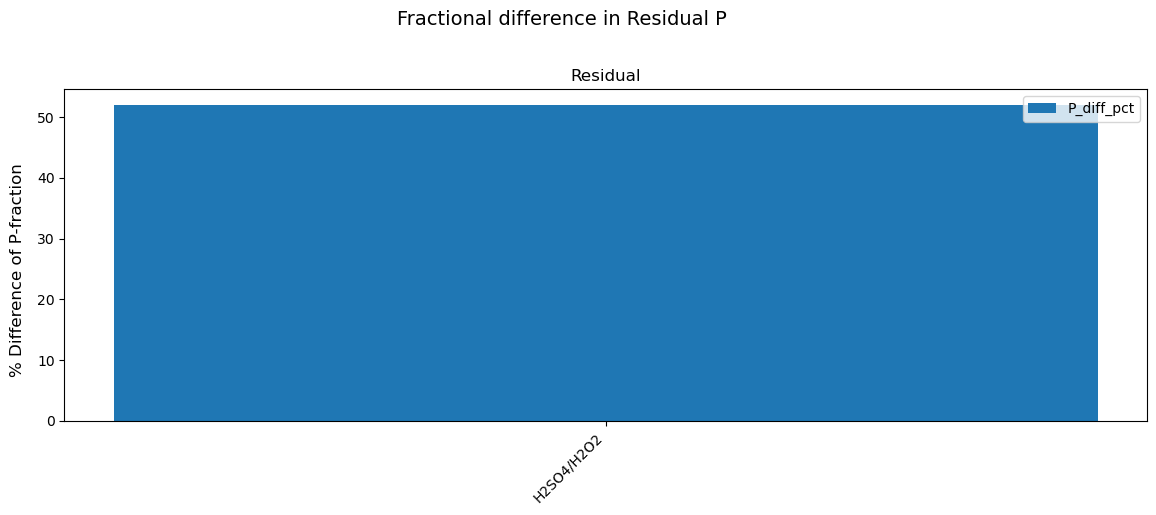

In [14]:
plot_grouped_bars(
    extract_df,
    category_col="Method",
    group_col="Pool",
    value_cols=["P_diff_pct"],
    groups_to_plot=["Residual"],
    title="Fractional difference in Residual P",
    ylabel="% Difference of P-fraction"
)

# Part 2

In [9]:
acre_m2 = 2 * 4046.86 # m2
bulk_wheat = 1.6 * 1000 # gcm-3
bulk_pasture = 1.4 * 1000 # gcm-3
ug_kg = 1000000

total_p = extract_df.groupby("Pool")[["Pasture", "Wheat"]].sum()
total_p_overall = extract_df[["Pasture", "Wheat"]].sum()

wheat_soil_vol = acre_m2 * bulk_wheat
pasture_soil_vol = acre_m2 * bulk_pasture


In [10]:
total_P_kg = total_p_overall / ug_kg
wheat_total_p = wheat_soil_vol * total_P_kg.iloc[0]
pasture_total_p = pasture_soil_vol * total_P_kg.iloc[1]


In [11]:
from IPython.display import display, Markdown

display(Markdown(
    fr"""
Mass of P in field managed for Pasture: {pasture_total_p:.2f} $kgP$\
Mass of P in field managed for Wheat: {wheat_total_p:.2f} $kgP$
"""
))


Mass of P in field managed for Pasture: 6238.96 $kgP$\
Mass of P in field managed for Wheat: 9994.77 $kgP$


This calculation assumes uniform P concentration, bulk soil density, and depth across a very large area so does not capture the spatial variability P concentrations throughout the study area. This calculation doesn't consider change over time which may be significant for the wheat cultivated pasture since the majority of the P is contained in plants the concentrations of P might vary seasonally.
The amount of P in the cultivated field was lower relative to the pasture field, if the only difference in P content was the cultivation strategy then regular additions of plant matter to the wheat cultivated field would help to increase the overall concentration of P in the soil.    